<a href="https://colab.research.google.com/github/MartinAbdrakhmanov/pyad-2024/blob/lab2/lab2/%D0%90%D0%B1%D0%B4%D1%80%D0%B0%D1%85%D0%BC%D0%B0%D0%BD%D0%BE%D0%B2_%D0%9C_%D0%9C_PY%D0%90%D0%94_%D0%9B%D0%A02_Make_Recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Данные

В этой лабораторной работе будем работать с [датасетом](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset), предназначенным для обучения алгоритма рекомендаций книг.

Для рекомендаций нам понадобятся таблицы `Books.csv` и `Ratings.scv`. Файл с рейтингами можно найти в папке с лабораторной работой на гитхабе. Файл с описаниями книг слишком большой, поэтому он располагается только по ссылке:
1. Файл с рейтингами (такой же, как в гитхабе): https://drive.google.com/file/d/1Hliaee7Y584-7lMoGeGjGabRRubzdoYn/view?usp=sharing
2. Файл с книгами:  https://drive.google.com/file/d/1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy/view?usp=sharing

In [ ]:
import pandas as pd

In [ ]:
!gdown 1Hliaee7Y584-7lMoGeGjGabRRubzdoYn
!gdown 1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy

Downloading...
From: https://drive.google.com/uc?id=1Hliaee7Y584-7lMoGeGjGabRRubzdoYn
To: /content/Ratings.csv
100% 22.6M/22.6M [00:00<00:00, 26.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy
To: /content/Books.csv
100% 73.3M/73.3M [00:02<00:00, 27.3MB/s]


Посмотрим на таблицу `Ratings`.

In [ ]:
ratings = pd.read_csv("Ratings.csv")
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
User-ID,1149780.0,140386.395126,80562.277718,2.0,70345.0,141010.0,211028.0,278854.0
Book-Rating,1149780.0,2.866950,3.854184,0.0,0.0,0.0,7.0,10.0


Как распределяются рейтинги?

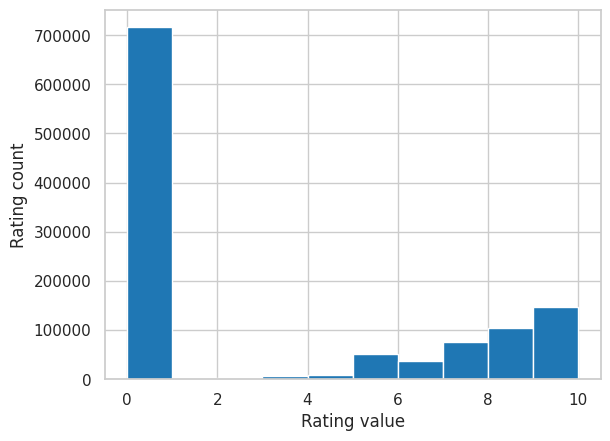

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook")
sns.set_style("whitegrid")

ratings["Book-Rating"].hist()
plt.xlabel("Rating value")
plt.ylabel("Rating count")
plt.show()


Теперь посмотрим на таблицу `Books`.

In [ ]:
books = pd.read_csv("Books.csv")
books.head()

<ipython-input-7-7dc4eb500039>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv")


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


- Есть немножко пропусков.
- Проверим уязвимую часть данных – года – на адекватность.

In [ ]:
books["Year-Of-Publication"].value_counts().sort_values(ascending=True)[:10]

,count
Year-Of-Publication,
2037,1
2011,1
2038,1
1938,1
1906,1
1919,1
1926,1
1926,1
2008,1


Есть года, которые еще не наступили...

Проверим, есть ли строковые данные в столбце с годом (потому что `info()` назвал тип данных столбца `object`).

In [ ]:
books[books["Year-Of-Publication"].map(str).str.match("[^0-9]")]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


В трех строках пропущен автор, из-за чего смещены данные. Автор либо пропущен, либо склеен с названием. Надо проверить.

В сводке написано, что часть авторов и издателей провущена. Проверим, так ли это.

In [ ]:
books[(books["Book-Author"].isnull()) | (books["Publisher"].isnull())]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


Да, это так. Основные проблемы с данными выявили. Пора их исправлять и приступать к созданию рекомендаций.

## План анализа данных

1. Обработать данные, т.к. в данных есть несколько небольших проблем:
  1. В паре строк в таблице `Books.scv` значения столбцов сдвинуты вправо, а еще есть года, которые еще не наступили.
  2. В нескольких строках в таблице `Books.scv` есть пропуски, а также для рекомендаций в рамках лабораторной не понадобятся ссылки на картинки с обложкой.
  3. Не будем использовать для обучения записи с рейтинг равным 0 из таблицы `Ratings.scv`. Считаем, что 0 означает, что пользователь еще не оценивал книгу, но проявил к ней какой-то интерес.
  4. Не будем использовать для обучения алгоритмов те книги, которым оценка поставлена всего 1 раз. Пользователей, оценивших всего одну книгу тоже брать в расчет не будем (хотя это на самом деле будет не сильно сказываться на обобщающей способности алгоритмов, можете сами проверить).
  5. Пункты 1-4 необходимы и достаточны для выполнения всех задач. Но можно сделать более глубокую обработку.
2. Обучить [SVD](https://surprise.readthedocs.io/en/stable/getting_started.html) на следующих записях: у книги есть хотя бы одна оценка, пользователь оценил хотя бы одну книгу.
   - МАЕ должно быть ниже 1.3 (для этого есть тест)
   - **Сохранить модель.**
3. Научить линейную регрессию ([SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)) предсказывать средний рейтинг книги по следующим столбцам: автор, издатель, год издания, векторизованное название (для векторизации можно использовать [tf-idf](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting), [word2vec](https://radimrehurek.com/gensim/models/word2vec.html) или более сложный алгоритм. Для достижения требуемой тестом точности достаточно будет tf-idf. Собрав полностью датасет, не забудьте нормализовать данные ([StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)).
   - МАЕ должно быть ниже 1.5 (для этого есть тест)
   - **Сохранить модель.**
4. В файле `personal_recommendation.py` создайте рекомендацию для пользователя, у которого в исходном датасете было больше всего 0 среди рейтингов книг.
   Алгоритм такой:
   1. Находим нужного пользователя.
   2. Делаем предсказание SVD для книг, которым он "поставил" 0.
   3. Берем те книги, для которых предсказали рейтинг не ниже 8. Считаем, что 8 означет, что книга ему точно понравится.
   4. Делаем предсказание LinReg для этих же книг.
   5. Сортируем полученный на шаге 3 список по убыванию рейтинга линейной модели.
   6. В конце файла комментарием записываем полученную рекомендацию.

- То есть идея в том, чтобы сделать для пользователя индивидуальную рекомендацию, показывая в начале списка те книги, которые в целом могли бы иметь высокий рейтинг.
- Обязательно сохраняйте готовую модель и добавляйте ее в свой репозиторий, потому что файл с сохраненной моделью используется в тестах.

## Куда сдавать?

По инструкции в гитхаб – https://shy-question-39d.notion.site/1150ea832e418032bfc3d3e827c380fb?pvs=74

- К этой работе есть два теста – на качество получившихся моделей.
- Пул-реквест нужно сделать в ветку `lab2`.
- Можно загрузить в гитхаб файлы с реализацией по шаблону (шаблон можно дополнять и изменять под себя) или подготовить колаб с решением. Главное – сохранить модели, тесты проверяют их.

> Будьте внимательны! На гитхабе в ветке `main` обновился файл `pyad.yml`.

**Устная защита работ не требуется, но вам могут быть заданы вопросы прямо в вашем пул-реквесте!**

## обработаем датасет

удалим строки, в которых в Year-Of-Publication не числовое значение, а затем строки где Year-Of-Publication > 2024

In [ ]:
books["Year-Of-Publication"] = pd.to_numeric(books["Year-Of-Publication"], errors="coerce")

books = books.dropna(subset=["Year-Of-Publication"])

books["Year-Of-Publication"] = books["Year-Of-Publication"].astype(int)

current_year = pd.Timestamp.now().year

books = books[books['Year-Of-Publication'] <= current_year]

<ipython-input-12-0798606572c3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books["Year-Of-Publication"] = books["Year-Of-Publication"].astype(int)


есть конечно и записи в которых год публикации 0, но в теории это возможно 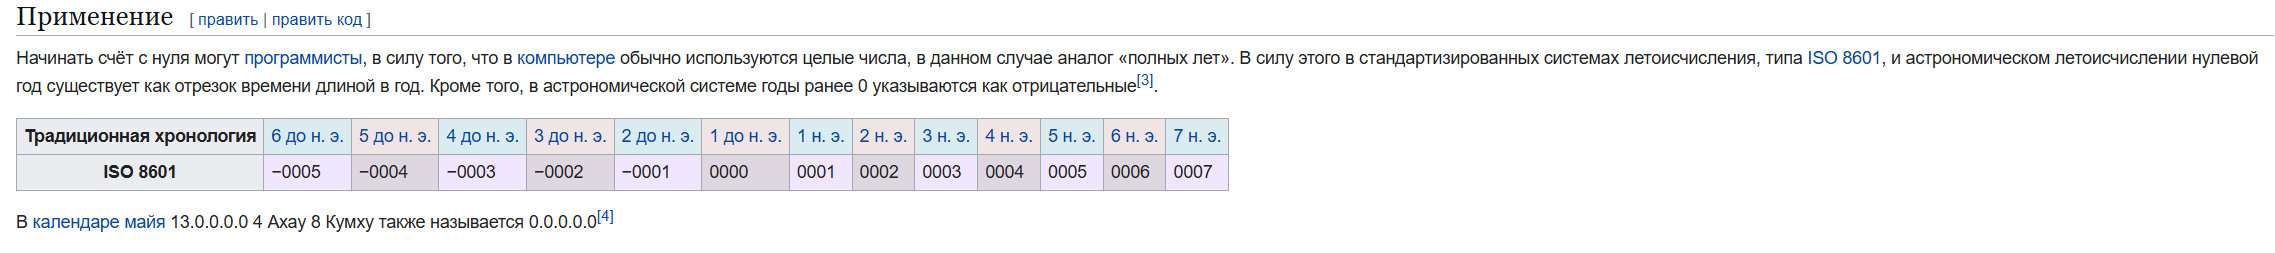

In [ ]:
books["Year-Of-Publication"].value_counts().sort_values(ascending=True)[:10]

,count
Year-Of-Publication,
1376,1
1897,1
1919,1
2024,1
1378,1
2008,1
2012,1
1934,1
1904,1


удалим ненужные столбцы и неполные строки

In [ ]:
books1 = books.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'])
books1.dropna(subset=['Book-Author', 'Publisher'], inplace=True)
books1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271341 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271341 non-null  object
 1   Book-Title           271341 non-null  object
 2   Book-Author          271341 non-null  object
 3   Year-Of-Publication  271341 non-null  int64 
 4   Publisher            271341 non-null  object
dtypes: int64(1), object(4)
memory usage: 12.4+ MB


удалим строки с 0 рейтингом

In [ ]:
ratings1 = ratings[ratings['Book-Rating'] > 0]
ratings1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433671 entries, 1 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      433671 non-null  int64 
 1   ISBN         433671 non-null  object
 2   Book-Rating  433671 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 13.2+ MB


Не будем использовать для обучения алгоритмов те книги, которым оценка поставлена всего 1 раз. Пользователей, оценивших всего одну книгу тоже брать в расчет не будем

In [ ]:
# Удаляем книги с единственной оценкой
book_counts = ratings1['ISBN'].value_counts()
books_to_keep = book_counts[book_counts > 1].index
ratings1 = ratings1[ratings['ISBN'].isin(books_to_keep)]

# Удаляем пользователей с единственной оценкой
user_counts = ratings1['User-ID'].value_counts()
users_to_keep = user_counts[user_counts > 1].index
ratings1 = ratings1[ratings['User-ID'].isin(users_to_keep)]


<ipython-input-16-8d1c6b1b86d6>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ratings1 = ratings1[ratings['ISBN'].isin(books_to_keep)]
<ipython-input-16-8d1c6b1b86d6>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ratings1 = ratings1[ratings['User-ID'].isin(users_to_keep)]


In [ ]:
ratings1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266402 entries, 16 to 1149775
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      266402 non-null  int64 
 1   ISBN         266402 non-null  object
 2   Book-Rating  266402 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 8.1+ MB


от 1.1 млн записей осталось 266 тысяч.

## SVD

In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 6.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357277 sha256=57a9daf043fa4f0b71d9a49b073ba466c5bab821d76835f8d4683135535e2b39
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
from surprise import SVD
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
import joblib


reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings1[['User-ID', 'ISBN', 'Book-Rating']], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

model = SVD()


model.fit(trainset)

predictions = model.test(testset)
mae = accuracy.mae(predictions)

if mae < 1.3:
    print(f"MAE достигнуто: {mae:.4f}")
    joblib.dump(model, "svd_model.pkl")
else:
    print(f"MAE выше 1.3: {mae:.4f}")


MAE:  1.2545
MAE достигнуто: 1.2545


## SGDRegressor

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import joblib

# 1. Предобработка данных

# Загрузка данных
# books = pd.read_csv('Books.csv')
# ratings = pd.read_csv('Ratings.csv')
bookscurr = books1
ratingscurr = ratings1
# Вычисляем средний рейтинг для каждой книги
average_ratings = ratingscurr.groupby('ISBN')['Book-Rating'].mean().reset_index()
average_ratings.rename(columns={'Book-Rating': 'Average-Rating'}, inplace=True)

# Объединяем данные
books = bookscurr.merge(average_ratings, on='ISBN', how='inner')

# Удаляем строки с пропусками в важных столбцах
books = books.dropna(subset=['Book-Author', 'Publisher', 'Average-Rating'])

# 2. Векторизация текста

# Векторизация названия книги
tfidf = TfidfVectorizer(max_features=500)  # Ограничиваем размерность до 500
title_vectors = tfidf.fit_transform(books['Book-Title']).toarray()

# 3. Преобразование категориальных данных

# Преобразование автора и издателя в числовые категории
label_encoder_author = LabelEncoder()
label_encoder_publisher = LabelEncoder()

books['Author-Encoded'] = label_encoder_author.fit_transform(books['Book-Author'])
books['Publisher-Encoded'] = label_encoder_publisher.fit_transform(books['Publisher'])

# 4. Масштабирование данных

scaler = StandardScaler()

# Масштабируем числовые признаки
books_scaled = scaler.fit_transform(books[['Year-Of-Publication', 'Author-Encoded', 'Publisher-Encoded']])
X = pd.concat([pd.DataFrame(books_scaled), pd.DataFrame(title_vectors)], axis=1)

# Целевая переменная
y = books['Average-Rating']

# 5. Разделение на обучение и тестирование
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Обучение модели

model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_train, y_train)

# 7. Оценка модели
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

# 8. Сохранение модели, если MAE < 1.5
if mae < 1.5:
    print("MAE ниже 1.5, сохраняем модель...")
    joblib.dump(model, "sgd_regressor_model.pkl")
    joblib.dump(tfidf, "tfidf_vectorizer.pkl")
    joblib.dump(scaler, "scaler.pkl")
    joblib.dump(label_encoder_author, "label_encoder_author.pkl")
    joblib.dump(label_encoder_publisher, "label_encoder_publisher.pkl")
else:
    print("MAE выше 1.5, попробуйте изменить параметры модели или данные.")


MAE: 0.9884077820285603
MAE ниже 1.5, сохраняем модель...


## 2 ver

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import pickle



# Вычисляем средний рейтинг для каждой книги
average_ratings = ratings1.groupby('ISBN')['Book-Rating'].mean().reset_index()
average_ratings.rename(columns={'Book-Rating': 'Average-Rating'}, inplace=True)

books2 = books1.merge(average_ratings, on='ISBN', how='inner')

books2 = books2.dropna(subset=['Book-Author', 'Publisher', 'Average-Rating'])

# Векторизация названия книги
tfidf = TfidfVectorizer(max_features=1000)
title_vectors = tfidf.fit_transform(books2['Book-Title']).toarray()

label_encoder_author = LabelEncoder()
label_encoder_publisher = LabelEncoder()

books2['Author-Encoded'] = label_encoder_author.fit_transform(books2['Book-Author'])
books2['Publisher-Encoded'] = label_encoder_publisher.fit_transform(books2['Publisher'])

scaler = StandardScaler()

# Масштабируем числовые признаки
books_scaled = scaler.fit_transform(books2[['Year-Of-Publication', 'Author-Encoded', 'Publisher-Encoded']])
X = pd.concat([pd.DataFrame(books_scaled), pd.DataFrame(title_vectors)], axis=1)

# Целевая переменная
y = books2['Average-Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SGDRegressor(max_iter=5000, tol=1e-5, learning_rate='adaptive', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

if mae < 1.5:
    print("MAE ниже 1.5")
    with open("linreg.pkl", "wb") as file:
        pickle.dump(model, file)
else:
    print("MAE выше 1.5")

MAE: 0.987518301206407
MAE ниже 1.5


## personnel_recomendations

In [ ]:
import pandas as pd
from surprise import SVD
from surprise import Dataset, Reader
import joblib

# books = pd.read_csv('Books.csv') обработанный датасет books
books = books1
ratings = pd.read_csv('Ratings.csv')

# Загрузка сохраненных моделей
svd_model = joblib.load("svd_model.pkl")
linreg_model = joblib.load("sgd_regressor_model.pkl")
tfidf = joblib.load("tfidf_vectorizer.pkl")
scaler = joblib.load("scaler.pkl")
label_encoder_author = joblib.load("label_encoder_author.pkl")
label_encoder_publisher = joblib.load("label_encoder_publisher.pkl")

#Определяем пользователя с наибольшим количеством рейтингов 0
user_with_most_zeros = ratings[ratings['Book-Rating'] == 0]['User-ID'].value_counts().idxmax()

#  0
user_zero_ratings = ratings[(ratings['User-ID'] == user_with_most_zeros) & (ratings['Book-Rating'] == 0)]
books_with_zero_ratings = user_zero_ratings['ISBN'].unique()

#SVD
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings[['User-ID', 'ISBN', 'Book-Rating']], reader)
svd_predictions = []

for isbn in books_with_zero_ratings:
    pred = svd_model.predict(user_with_most_zeros, isbn)
    if pred.est >= 8:  # рейтинг >= 8
        svd_predictions.append((isbn, pred.est))

recommended_books = [isbn for isbn, est in svd_predictions]

# линейная регрессии
books_filtered = books1[books1['ISBN'].isin(recommended_books)]

# tfidf
title_vectors = tfidf.transform(books_filtered['Book-Title']).toarray()


books_filtered['Author-Encoded'] = label_encoder_author.transform(books_filtered['Book-Author'])
books_filtered['Publisher-Encoded'] = label_encoder_publisher.transform(books_filtered['Publisher'])

scaled_features = scaler.transform(
    books_filtered[['Year-Of-Publication', 'Author-Encoded', 'Publisher-Encoded']]
)
X = pd.concat([pd.DataFrame(scaled_features), pd.DataFrame(title_vectors)], axis=1)

# предсказание рейтингов
books_filtered['LinReg-Pred'] = linreg_model.predict(X)

#Сортировка
final_recommendations = books_filtered.sort_values(by='LinReg-Pred', ascending=False)


recommendation_list = final_recommendations[['Book-Title', 'LinReg-Pred']].head(10)
print(recommendation_list)

# Howl and Other Poems (Pocket Poets) (Рейтинг линейной модели: 7.86)
# Harry Potter and the Chamber of Secrets (Book 2) (Рейтинг линейной модели: 7.83)
# Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)) (Рейтинг линейной модели: 7.77)
# Key of Valor (Roberts, Nora. Key Trilogy, 3.) (Рейтинг линейной модели: 7.75)
# The Lion, the Witch and the Wardrobe (Full-Color Collector's Edition) (Рейтинг линейной модели: 7.72)
# And Then There Were None (Рейтинг линейной модели: 7.72)
# Sideways Stories from Wayside School (Wayside School) (Рейтинг линейной модели: 7.67)
# Bridge to Terabithia (Рейтинг линейной модели: 7.66)
# The Power of Myth (Рейтинг линейной модели: 7.64)
# A Time to Kill (Рейтинг линейной модели: 7.63)


                                              Book-Title  LinReg-Pred
1707                 Howl and Other Poems (Pocket Poets)     7.857341
3459    Harry Potter and the Chamber of Secrets (Book 2)     7.826886
3354   The Hobbit : The Enchanting Prelude to The Lor...     7.786162
2143   Harry Potter and the Sorcerer's Stone (Harry P...     7.774083
1387                             A Prayer for Owen Meany     7.750399
6907            All I Need to Know I Learned from My Cat     7.739908
24292  The Lion, the Witch and the Wardrobe (Full-Col...     7.724264
26292  Hop on Pop (I Can Read It All by Myself Beginn...     7.717045
24364                         On the Banks of Plum Creek     7.693663
8671                           Walden and Other Writings     7.681849


<ipython-input-26-f3013e90def4>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_filtered['Author-Encoded'] = label_encoder_author.transform(books_filtered['Book-Author'])
<ipython-input-26-f3013e90def4>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_filtered['Publisher-Encoded'] = label_encoder_publisher.transform(books_filtered['Publisher'])
<ipython-input-26-f3013e90def4>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind